In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Что удалось выяснить

Для запуска лучше использовать `docker compose` с установленным eo-learn. Либу сложно и долго ставить на винду.

Пикл-файлы:
- bbox - объект BBox со значениями координат (широта и долгота) левого верхнего и правого нижнего края квадрата
- meta_info
```
{'size_x': 64,
 'size_y': 64,
 'time_interval': (datetime.datetime(2021, 6, 1, 0, 0),
  datetime.datetime(2021, 12, 31, 23, 59, 59)),
 'maxcc': 0.5,
 'time_difference': datetime.timedelta(seconds=3600),
 'resolution': 10}
 ```
 - timestamp - список datetime, в которые делались снимки


Маски:
- CLD - вроде норм показывает облака
- CLP - тоже вроде норм
- CLM - тоже относится к облакам, но из того что я посмотрел ничего не показывало (везде нули)
- IS_DATA - пока хз, везде нули
- SCL - Scene Classification map, показывает трубопровод, но не факт что должен
- SNW - хочется верить, что это снег, но хз

In [2]:
from read_data import load_numpy_gz, load_pickle_gz, read_image, read_timestamp, show_rgb, read_bbox

In [ ]:
path_to_dir = 'data/images/2021-01/1a0f2eb8-2529-4057-ad9e-e4a8cf542d0a/sentinel2-l2a/patches/64x64-10/2021/'

In [47]:
data = read_bbox(path_to_dir)
data

((64.97835190141572, 61.27648041756898),
 (64.99064527279144, 61.28204810415651))

Вот так можно вывести маску и изображение

В show_rgb выбираются [3, 2, 1] слои, потому что именно они отвечают за RGB

In [12]:
path_to_dir = 'data/images/Разметка/2017-01/РН-ННП-2020-138'
img = read_image(path_to_dir)
img.shape

(6, 64, 64, 13)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


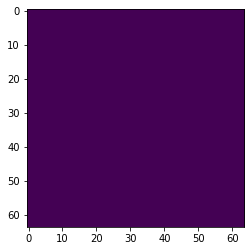

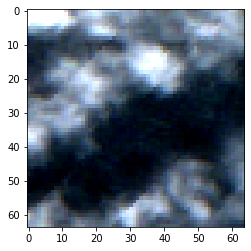

In [27]:
i = 0
path = os.path.join(path_to_dir, 'mask', 'SCL.npy.gz')
mask = load_numpy_gz(path)
plt.imshow(mask[i, :, :, :])
plt.figure()
img = read_image(path_to_dir)
# img[mask > 0] = 0
show_rgb(img, i=i)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


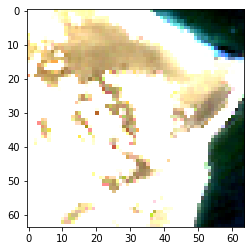

In [31]:
show_rgb(img, 0)

In [37]:
path_to_dir = 'data/images/Разметка/2017-01'

images = []
for dir_name in os.listdir(path_to_dir):
    try:
        img = read_image(os.path.join(path_to_dir, dir_name))
        images.append(img)
    except:
        pass

In [38]:
dataset = np.vstack(images)
dataset.shape

(4031, 64, 64, 13)